# L06: Pruning Decision Trees in Scikit-Learn

In [1]:
%load_ext watermark
%watermark  -d -u -a 'Sebastian Raschka' -v -p numpy,scipy,matplotlib,sklearn

Author: Sebastian Raschka

Last updated: 2021-10-05

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.28.0

numpy     : 1.21.2
scipy     : 1.7.0
matplotlib: 3.4.3
sklearn   : 1.0



In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.1, 
                         shuffle=True, random_state=1, stratify=y)

X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.3,
                         shuffle=True, random_state=1, stratify=y_temp)

print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))
print('Valid size', X_valid.shape, 'class proportions', np.bincount(y_valid))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test))

Train size (94, 2) class proportions [32 31 31]
Valid size (41, 2) class proportions [13 14 14]
Test size (15, 2) class proportions [5 5 5]


# Baseline tree

In [3]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

train_acc = tree.score(X_train, y_train)
valid_acc = tree.score(X_valid, y_valid)
test_acc = tree.score(X_test, y_test)

print(f'Training accuracy: {train_acc*100:.2f}%')
print(f'Validation accuracy: {valid_acc*100:.2f}%')
print(f'Depth: {tree.get_depth()}')

Training accuracy: 100.00%
Validation accuracy: 85.37%
Depth: 4


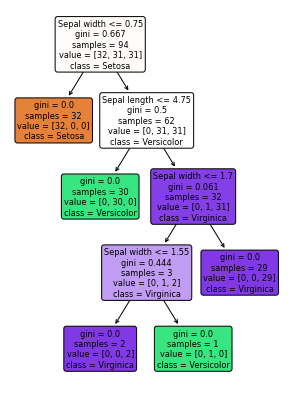

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(5, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          feature_names=['Sepal length', 'Sepal width',
                         'Petal length', 'Petal width'],
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica']
         )

#plt.tight_layout()
plt.show()

# Minimum Samples Per Leaf (Pre-pruning)

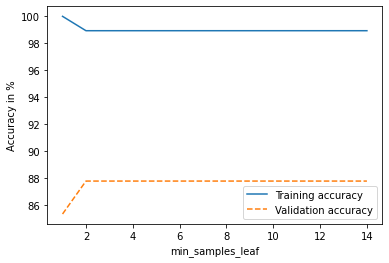

In [5]:
all_train_acc = []
all_valid_acc = []
all_hyperparam = []


for i in range(1, 15):
    tree = DecisionTreeClassifier(min_samples_leaf=i, random_state=1)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    valid_acc = tree.score(X_valid, y_valid)
    
    all_train_acc.append(train_acc*100)
    all_valid_acc.append(valid_acc*100)
    all_hyperparam.append(i)
    
plt.plot(all_hyperparam, all_train_acc, label='Training accuracy')
plt.plot(all_hyperparam, all_valid_acc, ls='--', label='Validation accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

In [6]:
tree = DecisionTreeClassifier(min_samples_leaf=2, random_state=1)
tree.fit(X_train, y_train)

train_acc = tree.score(X_train, y_train)
valid_acc = tree.score(X_valid, y_valid)
test_acc = tree.score(X_test, y_test)

print(f'Training accuracy: {train_acc*100:.2f}%')
print(f'Validation accuracy: {valid_acc*100:.2f}%')
print(f'Depth: {tree.get_depth()}')

Training accuracy: 98.94%
Validation accuracy: 87.80%
Depth: 3


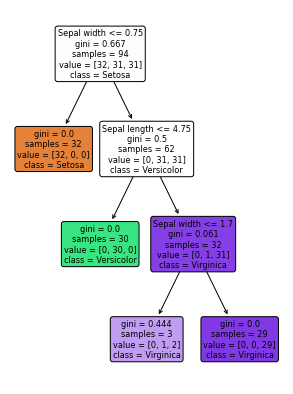

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(5, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          feature_names=['Sepal length', 'Sepal width',
                         'Petal length', 'Petal width'],
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica']
         )

#plt.tight_layout()
plt.show()

# Max Depth (Pre-pruning)

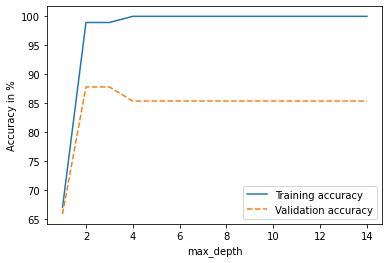

In [8]:
all_train_acc = []
all_valid_acc = []
all_hyperparam = []


for i in range(1, 15):
    tree = DecisionTreeClassifier(max_depth=i, random_state=1)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    valid_acc = tree.score(X_valid, y_valid)
    
    all_train_acc.append(train_acc*100)
    all_valid_acc.append(valid_acc*100)
    all_hyperparam.append(i)
    
plt.plot(all_hyperparam, all_train_acc, label='Training accuracy')
plt.plot(all_hyperparam, all_valid_acc, ls='--', label='Validation accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

Training accuracy: 98.94%
Validation accuracy: 87.80%
Depth: 2


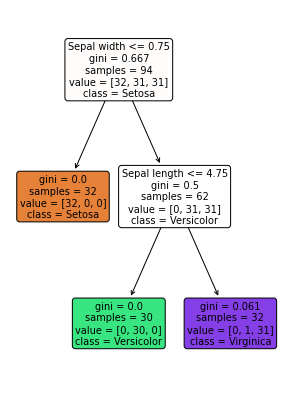

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


tree = DecisionTreeClassifier(max_depth=2, random_state=1)
tree.fit(X_train, y_train)

train_acc = tree.score(X_train, y_train)
valid_acc = tree.score(X_valid, y_valid)
test_acc = tree.score(X_test, y_test)

print(f'Training accuracy: {train_acc*100:.2f}%')
print(f'Validation accuracy: {valid_acc*100:.2f}%')
print(f'Depth: {tree.get_depth()}')


plt.figure(figsize=(5, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          feature_names=['Sepal length', 'Sepal width',
                         'Petal length', 'Petal width'],
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica']
         )

#plt.tight_layout()
plt.show()

# Cost Complexity Pruning

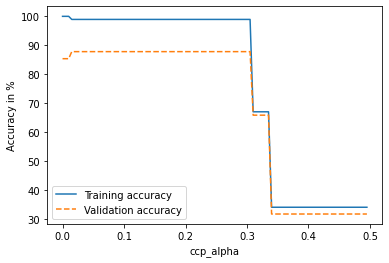

In [10]:
all_train_acc = []
all_valid_acc = []
all_hyperparam = []


for i in np.arange(0.0, 0.5, 0.005):
    tree = DecisionTreeClassifier(ccp_alpha=i, random_state=1)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    valid_acc = tree.score(X_valid, y_valid)
    
    all_train_acc.append(train_acc*100)
    all_valid_acc.append(valid_acc*100)
    all_hyperparam.append(i)
    
plt.plot(all_hyperparam, all_train_acc, label='Training accuracy')
plt.plot(all_hyperparam, all_valid_acc, ls='--', label='Validation accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

In [11]:
all_hyperparam[np.argmax(all_valid_acc)]

0.015

Training accuracy: 98.94%
Validation accuracy: 87.80%
Depth: 2


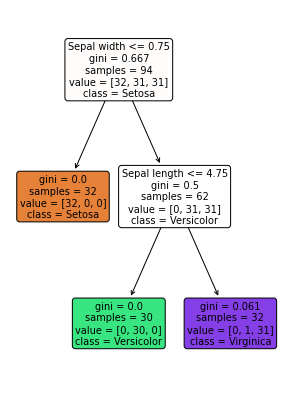

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


tree = DecisionTreeClassifier(ccp_alpha=0.015, random_state=1)
tree.fit(X_train, y_train)

train_acc = tree.score(X_train, y_train)
valid_acc = tree.score(X_valid, y_valid)
test_acc = tree.score(X_test, y_test)

print(f'Training accuracy: {train_acc*100:.2f}%')
print(f'Validation accuracy: {valid_acc*100:.2f}%')
print(f'Depth: {tree.get_depth()}')


plt.figure(figsize=(5, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          feature_names=['Sepal length', 'Sepal width',
                         'Petal length', 'Petal width'],
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica']
         )

#plt.tight_layout()
plt.show()

More info about minimal cost complexity pruning at 
- https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
- https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning